In [12]:
from numpy import hstack
from numpy.random import normal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Expectation Maximization Algorithm for Gaussian Mixture Model

The processes used to generate the data point represents a latent variable, e.g. process 0 and process 1. It influences the data but is not observable. As such, the EM algorithm is an appropriate approach to use to estimate the parameters of the distributions.

In the EM algorithm, the estimation-step would estimate a value for the process latent variable for each data point, and the maximization step would optimize the parameters of the probability distributions in an attempt to best capture the density of the data. The process is repeated until a good set of latent values and a maximum likelihood is achieved that fits the data.

*) E-Step. Estimate the expected value for each latent variable.

*) M-Step. Optimize the parameters of the distribution using maximum likelihood.

We can imagine how this optimization procedure could be constrained to just the distribution means, or generalized to a mixture of many different Gaussian distributions.

(array([2.67394756e-04, 1.78263171e-04, 8.02184269e-04, 9.80447440e-04,
        1.78263171e-03, 2.85221073e-03, 5.52615830e-03, 8.02184269e-03,
        9.53707964e-03, 1.44393168e-02, 1.61328170e-02, 1.70241328e-02,
        2.35307386e-02, 2.42437912e-02, 2.27285543e-02, 2.32633438e-02,
        1.97872120e-02, 2.00546067e-02, 1.64002117e-02, 1.25675535e-02,
        1.08740534e-02, 1.06957903e-02, 9.18055330e-03, 1.08740534e-02,
        1.55980275e-02, 2.03220015e-02, 2.50459755e-02, 3.11069233e-02,
        3.71678711e-02, 4.69723455e-02, 5.33898197e-02, 5.50833198e-02,
        5.68659515e-02, 5.41920040e-02, 4.62592928e-02, 4.26940294e-02,
        3.34243445e-02, 2.80764494e-02, 2.16589753e-02, 1.47958432e-02,
        1.13197114e-02, 5.88268464e-03, 4.54571086e-03, 2.58481598e-03,
        1.06957903e-03, 6.23921098e-04, 7.13052684e-04, 0.00000000e+00,
        8.91315855e-05, 8.91315855e-05]),
 array([ 3.75944837,  4.8813851 ,  6.00332184,  7.12525857,  8.24719531,
         9.36913204, 

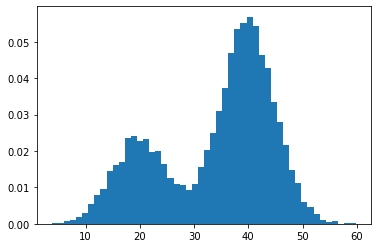

In [11]:
# generates the samples
X1 = normal(loc=20, scale=5, size=3000)
X2 = normal(loc=40, scale=5, size=7000)
X = hstack((X1, X2))
X = X.reshape((len(X), 1))
# plot the histogram
plt.hist(X, bins=50, density=True)

In [41]:
from sklearn.mixture import GaussianMixture
# fit model
model = GaussianMixture(n_components=2, init_params='random')
model.fit(X)
yhat = model.predict(X)
# check the latent values from the first 100 points
print(yhat[:100])
print(yhat[-100:])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
from scipy import stats
print(X[:10])
print(X[-10:])

[[22.8282194 ]
 [31.71486004]
 [24.21460697]
 [ 7.01699808]
 [19.52971087]
 [23.66404685]
 [18.09470022]
 [12.82623753]
 [19.02973996]
 [14.01070128]]
[[48.56494761]
 [37.93762816]
 [40.17001299]
 [49.47079342]
 [37.48931097]
 [45.63614128]
 [39.34735202]
 [38.47908232]
 [48.38357836]
 [39.07343322]]


<BarContainer object of 10000 artists>

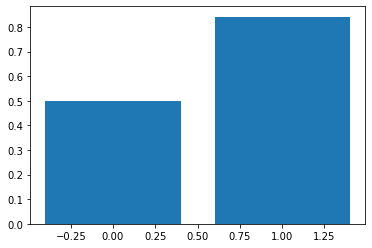

In [43]:
plt.bar(yhat, stats.norm.cdf(yhat))

<BarContainer object of 10000 artists>

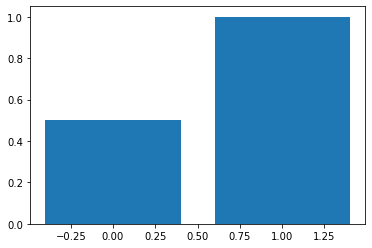

In [46]:
p = 0.5
plt.bar(yhat, stats.bernoulli.cdf(yhat, p))